In [1]:
# importing libraries for analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the zomato dataset
zomato = pd.read_csv('Zomato data .csv')
#Checking the head of the data
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


As we can see the rating is out of 5, we need to handle it and make it to only rating given by the customers.

### Understanding and handling the data set

In [7]:
#Checking the data type of rate columns
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


As it can be seen that rate column is an object data type. So first it needed to be converted into string type and then return it as float type

In [8]:
# defining a function for handling the rate
'''
This function will take the input value, 
then convert it to string data type and 
split the string by / 
finally return the float value
'''
def Rate_Handler(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [9]:
zomato.rate = zomato.rate.apply(Rate_Handler)
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


So, now the rate is in required form

In [10]:
#checking for the null values 
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

So, there are no null values in the given dataset

So, now it's time to move for analysis

### Exploratory data analysis (EDA)

All the columns will be analysised one by one

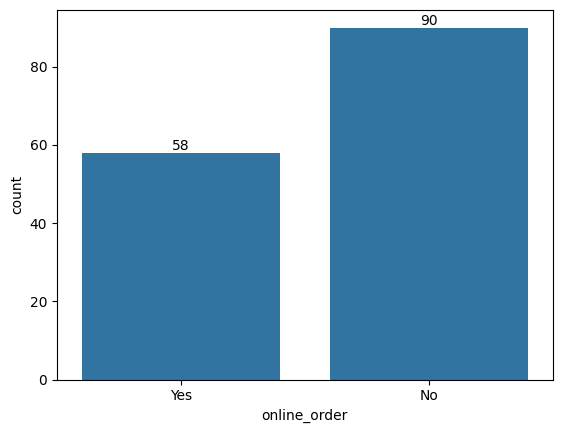

In [ ]:
# First Column is Online Order
sns.countplot(x=zomato['online_order'])

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')  # Adding count labels with integer format

plt.show()

90 Restaurants or Cafe do not take online orders.

`Suggestions`: These cafes should establish an online presence to expand their business, as the majority of people in today's globalized world are active online.

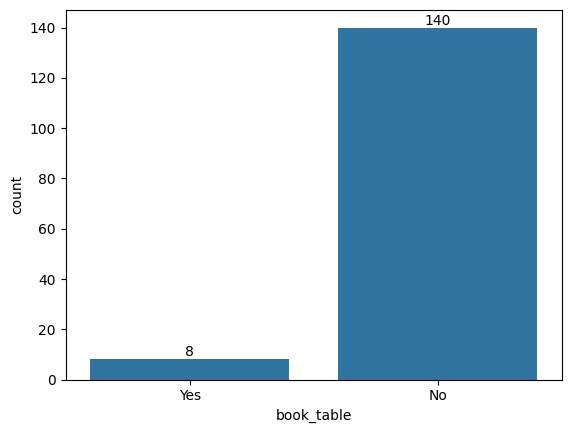

In [14]:
# Second column Book table
sns.countplot(x=zomato['book_table'])

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')  # Adding count labels with integer format

plt.show()

Most of the restaurant or Cafe should have booking table concept. That implies, people can walk in any time during the operating hours of the restaurant

In [ ]:
# Checking for the highest rated restaurant
restaurant_with_highest_rating = zomato.loc[zomato.rate == zomato.rate.max(), 'name'].unique()[0]
print(f'Restaurant with the highest rating is {restaurant_with_highest_rating} with rating {zomato.rate.max()}')
# Checking for the lowest rated restaurant
restaurant_with_lowest_rating = zomato.loc[zomato.rate == zomato.rate.min(), 'name'].unique()[0]
print(f'Restaurant with the lowest rating is: {restaurant_with_lowest_rating} with rating {zomato.rate.min()}')

Restaurant with the highest rating is Onesta with rating 4.6
Restaurant with the lowest rating is: Nandhini Deluxe with rating 2.6


In [44]:
# Checking for the highest number of votes for restaurants
restaurant_with_highest_vote = zomato.loc[zomato.votes == zomato.votes.max(), ['name','rate']].iloc[0]
print(f'Restaurant with the highest vote and its rating\n{restaurant_with_highest_vote}')
print(f'NUmber of Votes are {zomato.votes.max()}')
# Checking for the lowest number of votes for restaurants
restaurant_with_lowest_vote = zomato.loc[zomato.votes == zomato.votes.min(), ['name', 'rate']].iloc[0]
print(f'Restaurant with the lowest vote and its rating\n{restaurant_with_lowest_vote} ')
print(f'NUmber of Votes are {zomato.votes.min()}')

Restaurant with the highest vote and its rating
name    Empire Restaurant
rate                  4.4
Name: 38, dtype: object
NUmber of Votes are 4884
Restaurant with the lowest vote and its rating
name    Spicy Tandoor
rate              4.1
Name: 72, dtype: object 
NUmber of Votes are 0
